**Gradient Decent for optimization of w & b values for calculating minimum cost function for squared cost function scenario with unilateral linear regression**

**Before understanding gradient decent, let's clear out some fundamental concepts around linear regression**

1. Linear regression is mathematical computation of how a dependent variable value changes based on change in value of one or more independent variables taking two constant variables into account, one is bias that determines the starting point of the regression model line along the y-axis and second is slope of the line that is accounted based on rate of change of y per rate of change in x
2. Linear regression model is represented on a 2D graph in a line representation to identify the best possible straight line fit for training examples
3. Underlying mathematical computation involves the use of concepts of linear equations which by design allows the dependent variable denotion that is based on one or more independent variables coupled with constants to achieve right derivations

**Let's now understand the slope (coefficient) & bias (intercept) of the line**

1. Slope of the line is calculated by determining rate of change in y for every one unit change in x, let's say we have two points on the graph, one is (1,300) and second is (2,500), now to find the slope of the line that intercepts these two points, you want to calculate the change in y divided by unit change in x so in this case it would be 500-300/2-1 which comes out as 200, so in this case slope of the line is 200, so for every step change in x we get an incremental increase in y by 200
2. Bias or intercept of the line is where the line meets/intercepts y-axis and this is an important determinant of slope of the line as well

**Now let's understand the concept of cost function**

1. Cost function is fundamentally used to determine how well a linear regression model fits the data and it is calculated by deriving the error in linear regression model based on how deviated predicted values are from actual values of dependent variable and the formula is pretty straightforward: rate of error = sum of (predicted value (by linear regression function mx + b) - actual value)/2 * size of data, the idea is to minimize this average 
2. Cost function on a graphical representation is plotted in 3D against the values of coefficient (weight/slope ) and intercept (bias), in simple linear regression, this is usually a bowl shaped with one global minimum cost error which can be calculated by using gradient decent

**Now let's understand the concept of multiple independent variable linear regression**

1. If there are multiple independent variables, linear regression equation looks like this predicted value = (x1*m1 + x2*m2 + x3*m3 + x4*m4 ...) + b
2. Note each independent variable can have its own coefficient/weight parameter and single bias across the model to keep it simple and easier for calculations
3. Cost function or error calculation for multiple independent variables does not change and remains as the sum of (difference in predicted and actual value)/size of data*2
4. Visualization of multiple weight/coefficient parameters along with cost/error and bias can be plotted on a 3D multidimensional graph and usually using has a convex bowl like shape with one global minimum cost/error

**Now let's understand the concept of derivatives**

Ref: https://www.youtube.com/watch?v=rAof9Ld5sOg

1. Derivative is computation of the slope of a certain point on the function curve 
2. Slope is calculated based on change in y divided by change in x at any two points on the line
3. Derivative can also be computed in a similar manner by taking a secant line on a curve at two points such that one point is where we want to calculate the slope for a tangent line and find the difference between positioning of x which acts as the denominator to the difference between y points and the idea is to limit the value of h or distance to 0 so lines converge and form a tangent line, derivative limit h -> 0 = (function of x+h(distance between x)) - (function of x)/x+h-x
4. We use the concept of partial derivative to draw out a tangent line by keeping the other model parameter constant

**Now let's understand the concept of gradient decent (In simple bilateral linear regression)**

1. In Gradient decent we calculate the slope of tangent at a particular point on the curve of cost function, or in other words we take derivative of the cost function if it is negative which means the slope is negative then we increase the model parameter to minimize the cost/error, if the slope is positive then we decrease the model parameter to minimize the cost/error until we find the local/global minimum cost/error
2. Increase the model parameter if the slope of the tangent at a particular point on the curve is negative or decrease the model parameter if the derivative of cost function a that point is positive
3. Gradient decent is used to determine the change in model parameters (bias or intercept and slop or coefficient) based on a learning rate which is measured as step change until the model parameters either converge or do not change much any further
4. In simple linear regression, this is calculated as m = m - alpha(learning rate) * derivative of cost function and b = b - alpha(learning rate) * derivative of cost function
5. In simple linear regression, there is only one global minimum since the cost/errors usually form up a bowl shape when sum of square of error function is used
6. Eventually after certain number of iterations if the learning rate is small enough there will be convergence so there are two ways to stop iterations, either you check if the value of the model parameters have stopped changing that is converged or if the value of the cost function has started increasing leading to divergence

In [1]:
# Import libraries 

import numpy as np
import matplotlib.pyplot as plt
import math, copy

In [2]:
# Taking unilateral regression problem of housing prices

x_train = np.array([1.0,2.0]) # input feature for house size in sq. ft. (1000s)
y_train = np.array([300.0,500.0]) # target values based on input feauture of house price in $ (1000s)

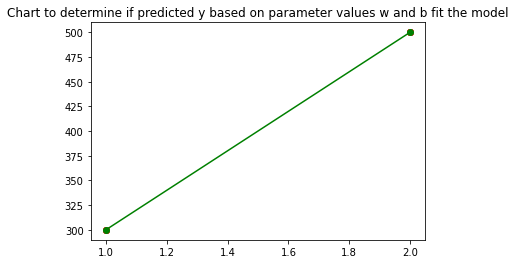

In [3]:
# Rewinding previous implementations of predicting y value function based on w & b and cost function

# Predicting value of y based on given values of x
# Let's say the ideal value for w is 100 and b is 100
w = 200
b = 100

x_train_size = x_train.shape[0]

y_predict = np.zeros(x_train_size)

for i in range(x_train_size):
    y_predict[i] = w * x_train[i] + b

# Plotting values of x and y is known and x and y when y is predicted

plt.plot(x_train, y_train, marker='o', color='g')
plt.scatter(x_train, y_predict, marker='X', color='r')
plt.title("Chart to determine if predicted y based on parameter values w and b fit the model")
plt.xlabel("House size in sqft (1000s)")
plt.ylabel("House prices in $ (1000s)")
plt.show()

For value of w: -500, Compute cost is: 2450000.0
For value of w: -400, Compute cost is: 1800000.0
For value of w: -300, Compute cost is: 1250000.0
For value of w: -200, Compute cost is: 800000.0
For value of w: -100, Compute cost is: 450000.0
For value of w: 0, Compute cost is: 200000.0
For value of w: 100, Compute cost is: 50000.0
For value of w: 200, Compute cost is: 0.0
For value of w: 300, Compute cost is: 50000.0
For value of w: 400, Compute cost is: 200000.0
For value of w: 500, Compute cost is: 450000.0


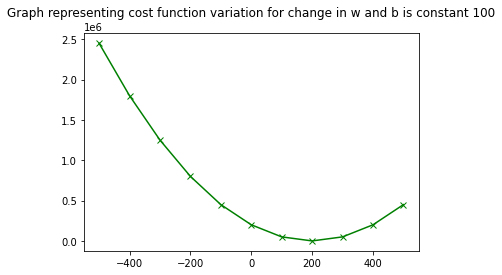

In [8]:
# Now let's test multiple values of w to determine cost function when b is constant 100

# Revisiting calculation of predicting value is function f of wb = w*x + b
# Revisiting calculation of computing cost for set of x values where w & b are known is function j of wb = Sum of ((sq of (f of wb(x)) - y))/m*2

arr_w = np.array([-500,-400,-300,-200,-100,0,100,200,300,400,500])
b = 100

def compute_cost_function(x,y,w,b):
    compute_cost_total = 0
    for i in range(x_train_size):
        compute_cost_total += np.square((x[i] * w + b) - y[i])
    compute_cost_total = compute_cost_total/x_train_size * 2
    return compute_cost_total

arr_w_size = arr_w.shape[0]

arr_compute_cost_w = np.zeros(arr_w_size)
for i in range(arr_w_size):
    arr_compute_cost_w[i] = compute_cost_function(x_train, y_train, arr_w[i], b)
    print(f"For value of w: {arr_w[i]}, Compute cost is: {arr_compute_cost_w[i]}")

plt.plot(arr_w, arr_compute_cost_w, marker='x', color='g')
plt.title("Graph representing cost function variation for change in w and b is constant 100")
plt.xlabel = "Model weight parameter w"
plt.ylabel = "Model cost function"
plt.show()

When weight w is: -500 and bias is: -500 then compute cost is: 5690000.0
When weight w is: -500 and bias is: -400 then compute cost is: 5050000.0
When weight w is: -500 and bias is: -300 then compute cost is: 4450000.0
When weight w is: -500 and bias is: -200 then compute cost is: 3890000.0
When weight w is: -500 and bias is: -100 then compute cost is: 3370000.0
When weight w is: -500 and bias is: 0 then compute cost is: 2890000.0
When weight w is: -500 and bias is: 100 then compute cost is: 2450000.0
When weight w is: -500 and bias is: 200 then compute cost is: 2050000.0
When weight w is: -500 and bias is: 300 then compute cost is: 1690000.0
When weight w is: -500 and bias is: 400 then compute cost is: 1370000.0
When weight w is: -500 and bias is: 500 then compute cost is: 1090000.0
When weight w is: -400 and bias is: -500 then compute cost is: 4680000.0
When weight w is: -400 and bias is: -400 then compute cost is: 4100000.0
When weight w is: -400 and bias is: -300 then compute cost 

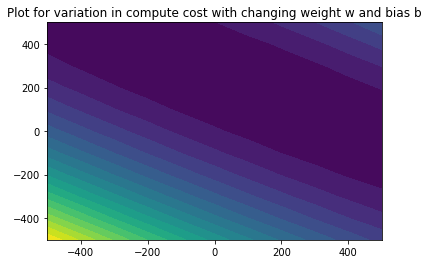

In [9]:
# Let's recalculate the cost function when both model parameters weight w and bias b are varying

arr_b = np.array([-500,-400,-300,-200,-100,0,100,200,300,400,500])

arr_b_size = arr_b.shape[0]

arr_cost_fn = np.zeros((arr_w_size, arr_b_size))

for i in range(arr_w_size):
    for j in range(arr_b_size):
        arr_cost_fn[i,j] = compute_cost_function(x_train, y_train, arr_w[i],arr_b[j])
        print(f"When weight w is: {arr_w[i]} and bias is: {arr_b[j]} then compute cost is: {arr_cost_fn[i,j]}")

plt.contourf(arr_w, arr_b, arr_cost_fn, levels=20,cmap='viridis')
plt.title("Plot for variation in compute cost with changing weight w and bias b")
plt.xlabel = "Model Weight parameter w"
plt.ylabel = "Model Bias parameter b"
plt.show()


In [10]:
# Compute the gradient decent which specifies the small change in model paramters driven by learning rate multiple of derivative of cost function
# Idea is to keep performing gradient decent until model parameters converge where localized cost function is really small (in complex regression)
# In linear regression cost function has one global minimum value to which we can adjust learning rate becuase cost function is square of sum of all error rates
# The idea is to converge model parameters so they individually do not change much
# Which after derivative is computed as per calculus derives to gradient decent for w is 
# Derivation of compute gradient for w is: sum((f_predict(x) - y) * x) / m
# Derivation of compute gradient for b is: sum((f_predict(x) - y)) / m

def compute_gradient(x,y,w,b):
    size_x = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(size_x):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = (f_wb - y[i])

        dj_dw += dj_dw_i
        dj_db += dj_db_i

    dj_dw = dj_dw/size_x
    dj_db = dj_db/size_x

    return dj_dw, dj_db

In [11]:

def gradient_descent(x, y, w_in, b_in, alpha, num_iter, compute_cost_fn, compute_gradient_fn):

    # Args:
    #  x (ndarray (m,))  : Data, m examples 
    #  y (ndarray (m,))  : target values
    #  w_in,b_in (scalar): initial values of model parameters  
    #  alpha (float):     Learning rate
    #  num_iters (int):   number of iterations to run gradient descent
    #  cost_function:     function to call to produce cost
    #  gradient_function: function to call to produce gradient
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    j_history = []
    p_history = []

    b = b_in
    w = w_in

    for i in range(num_iter):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = compute_gradient(x, y, w, b)

        # Update Parameters
        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        # Save cost J at each iteration
        if i<100000:    # prevent resource exhaustion 
            j_history.append(compute_cost_function(x,y,w,b))
            p_history.append([w,b])

        # Function math.ceil is used to determine the next whole number from the number passed
        # i% math.ceil(num_iters/10) == 0 is used to determine step intervals in this case 10 intervals
        # This also denotes that if there are less than 10 intervals then it will iterate 10 times
        # Print cost every at intervals 10 times or as many iterations if < 10
        # {i:4} is used for formatting the variable i with a width of 4 characters

        if i% math.ceil(num_iter/10) == 0:
            print(f"Iteration {i:4}: Cost {j_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")

    return w, b, j_history, p_history

Iteration    0: Cost 3.17e+05  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  6.500e+00, b: 4.00000e+00
Iteration 1000: Cost 1.37e+01  dj_dw: -3.712e-01, dj_db:  6.007e-01   w:  1.949e+02, b: 1.08228e+02
Iteration 2000: Cost 3.17e+00  dj_dw: -1.789e-01, dj_db:  2.895e-01   w:  1.975e+02, b: 1.03966e+02
Iteration 3000: Cost 7.37e-01  dj_dw: -8.625e-02, dj_db:  1.396e-01   w:  1.988e+02, b: 1.01912e+02
Iteration 4000: Cost 1.71e-01  dj_dw: -4.158e-02, dj_db:  6.727e-02   w:  1.994e+02, b: 1.00922e+02
Iteration 5000: Cost 3.98e-02  dj_dw: -2.004e-02, dj_db:  3.243e-02   w:  1.997e+02, b: 1.00444e+02
Iteration 6000: Cost 9.24e-03  dj_dw: -9.660e-03, dj_db:  1.563e-02   w:  1.999e+02, b: 1.00214e+02
Iteration 7000: Cost 2.15e-03  dj_dw: -4.657e-03, dj_db:  7.535e-03   w:  1.999e+02, b: 1.00103e+02
Iteration 8000: Cost 4.99e-04  dj_dw: -2.245e-03, dj_db:  3.632e-03   w:  2.000e+02, b: 1.00050e+02
Iteration 9000: Cost 1.16e-04  dj_dw: -1.082e-03, dj_db:  1.751e-03   w:  2.000e+02, b: 1.00024e+02


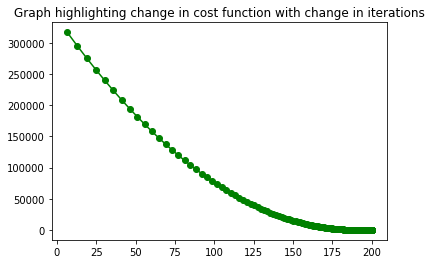

In [14]:
w_init=0
b_init=0

iterations=10000
tmp_alpha=1.0e-2

w_final, b_final, j_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost_function, compute_gradient)

print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

w_values = [params[0] for params in p_hist]

plt.plot(w_values, j_hist,marker='o',color='g')
plt.xlabel = "Number of iterations"
plt.ylabel = "Cost per iteration"
plt.title("Graph highlighting change in cost function with change in iterations")
plt.show()